# Auto Regressive Lnear Model for Time Series Forecasting

In [57]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn

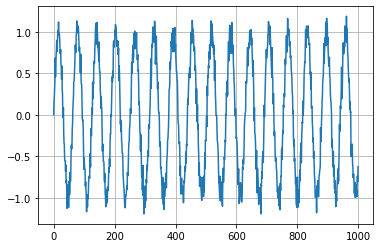

In [58]:
N = 1000

series = np.sin(0.1*np.arange(N)) + np.random.randn(N)*0.1 

plt.plot(series)
plt.grid()

In [59]:
T = 10

X = []
Y = []

for t in range(len(series)-T):

    x = series[t:t+T]
    X.append(x)
    y = series[t+T]
    Y.append(y)

X = np.array(X).reshape(-1,T)
Y = np.array(Y).reshape(-1,1)

N = len(X)




In [60]:
model = nn.Linear(T,1)

criterion = nn.MSELoss()

optimizer = torch.optim.Adam(model.parameters(), lr=0.1)

X_train = torch.from_numpy(X[:-N//2].astype(np.float32))

y_train = torch.from_numpy(Y[:-N//2].astype(np.float32))

X_test = torch.from_numpy(X[-N//2:].astype(np.float32))

y_test = torch.from_numpy(Y[-N//2:].astype(np.float32))

In [61]:
def full_gd(model, criterion, optimizer, X_train, y_train, X_test, y_test, epochs=200):

    train_losses = np.zeros(epochs)
    test_losses = np.zeros(epochs)

    for it in range(epochs):
        optimizer.zero_grad()

        outputs = model(X_train)
        loss = criterion(outputs, y_train)
        loss.backward()
        optimizer.step()
        train_losses[it] = loss.item()

        test_outputs = model(X_test)
        test_loss = criterion(test_outputs, y_test)
        test_losses[it] = test_loss.item()
                
        if (it + 1) % 5 == 0:
            print(f'Epoch {it+1}/{epochs}, Train Loss: {loss.item():.4f}, Test Loss: {test_loss.item():.4f}')

    return train_losses, test_losses

In [62]:
train_losses, test_losses = full_gd(model,
                                    criterion,
                                    optimizer,
                                    X_train,
                                    y_train,
                                    X_test,
                                    y_test)

Epoch 5/200, Train Loss: 0.6009, Test Loss: 0.4080
Epoch 10/200, Train Loss: 0.1915, Test Loss: 0.2084
Epoch 15/200, Train Loss: 0.0175, Test Loss: 0.0468
Epoch 20/200, Train Loss: 0.0508, Test Loss: 0.0360
Epoch 25/200, Train Loss: 0.0733, Test Loss: 0.0634
Epoch 30/200, Train Loss: 0.0423, Test Loss: 0.0491
Epoch 35/200, Train Loss: 0.0178, Test Loss: 0.0235
Epoch 40/200, Train Loss: 0.0153, Test Loss: 0.0164
Epoch 45/200, Train Loss: 0.0189, Test Loss: 0.0188
Epoch 50/200, Train Loss: 0.0188, Test Loss: 0.0197
Epoch 55/200, Train Loss: 0.0160, Test Loss: 0.0180
Epoch 60/200, Train Loss: 0.0142, Test Loss: 0.0170
Epoch 65/200, Train Loss: 0.0138, Test Loss: 0.0168
Epoch 70/200, Train Loss: 0.0137, Test Loss: 0.0165
Epoch 75/200, Train Loss: 0.0134, Test Loss: 0.0161
Epoch 80/200, Train Loss: 0.0133, Test Loss: 0.0158
Epoch 85/200, Train Loss: 0.0132, Test Loss: 0.0158
Epoch 90/200, Train Loss: 0.0132, Test Loss: 0.0157
Epoch 95/200, Train Loss: 0.0131, Test Loss: 0.0156
Epoch 100/200

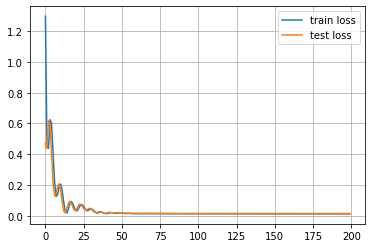

In [63]:
plt.plot(train_losses, label='train loss')
plt.plot(test_losses, label='test loss')
plt.legend()
plt.grid()

In [64]:
validation_predictions = []

validation_target = Y[-N//2:]

last_x = torch.from_numpy(X[-N//2].astype(np.float32))

while(len(validation_predictions)<len(validation_target)):

    input = last_x.view(1,-1)

    p = model(input)

    validation_predictions.append(p[0,0].item())

    last_x = torch.cat((last_x[1:], p[0]))


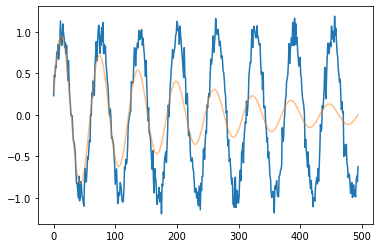

In [65]:
plt.plot(validation_target)
plt.plot(validation_predictions, alpha=0.5)